# Exercise 03
## Autoregressive Integrated Moving Average Model
- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

### Integrantes
<img style="float: right;" src="https://uniandes.edu.co/sites/default/files/logo-uniandes.png" width=130>
<ul>
    <li>Angela Fernanda Romero Fonseca - 201819276</li>
    <li>Carlos Francisco Silva Ortiz - 201920463</li>
    <li>Daniela Carolina Sanabria Guerrero -201116798</li>
    <li>Juan Camilo Florez - 201620135</li>
</ul>

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

### Integrantes

- Angela Fernanda Romero Fonseca - 201819276
- Carlos Francisco Silva Ortiz - 201920463
- Daniela Carolina Sanabria Guerrero -201116798
- Juan Camilo Florez - 201620135

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('datasets\data_arma.csv', sep=',', index_col=0)

In [4]:
data.head()

,ts1,ts2,ts3,ts4
0,0.533570,-0.126804,-0.802837,1.812825
1,1.240130,1.314360,-0.595602,0.042764
2,1.618598,1.405994,0.127180,-1.759427
3,1.140465,3.132621,0.958586,-0.456798
4,0.481561,3.179083,0.164598,-1.254790


a) Graficamos cada una de las variables junto con su Gráfico de autocorrelación y autocorrelación parcial correspondiente:

# TS1

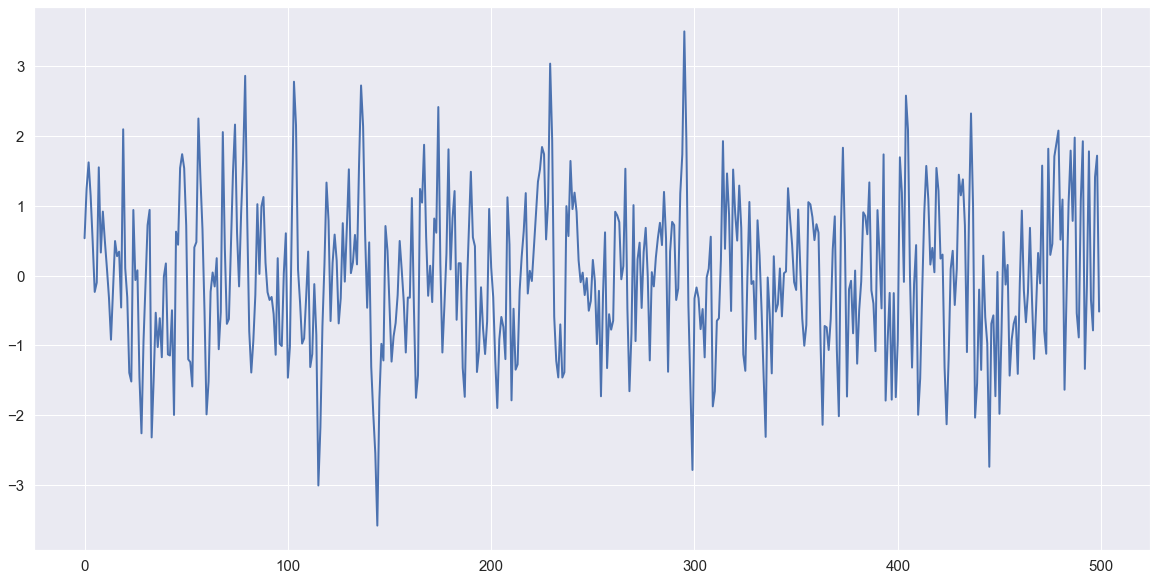

In [5]:
data['ts1'].plot(figsize=(20,10), linewidth=2, fontsize=15);

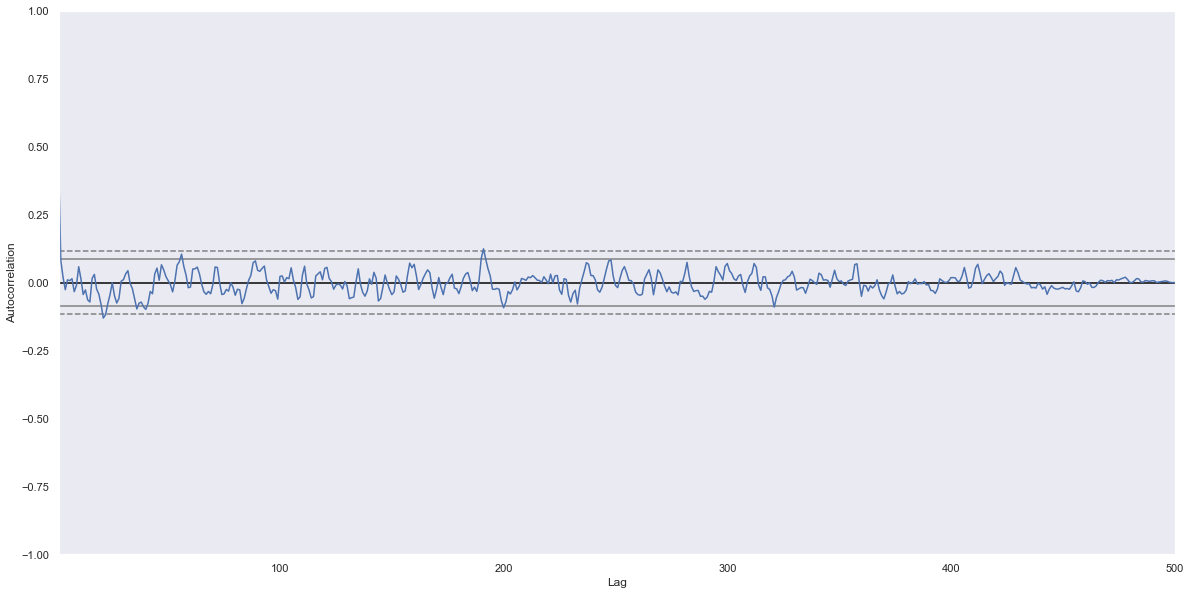

In [6]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(data['ts1']);

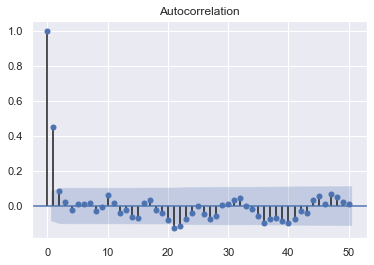

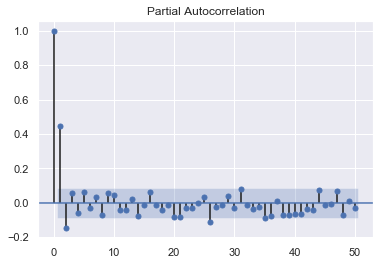

In [7]:
plot_acf(data['ts1'], lags=50);
plot_pacf(data['ts1'], lags=50);

- <b>TS1</b>. Según la gráfica de autocorrelación, esta cae después del 1ero elemento pero empieza a fluctuar, por ende, este es un MA de orden 1

# TS2

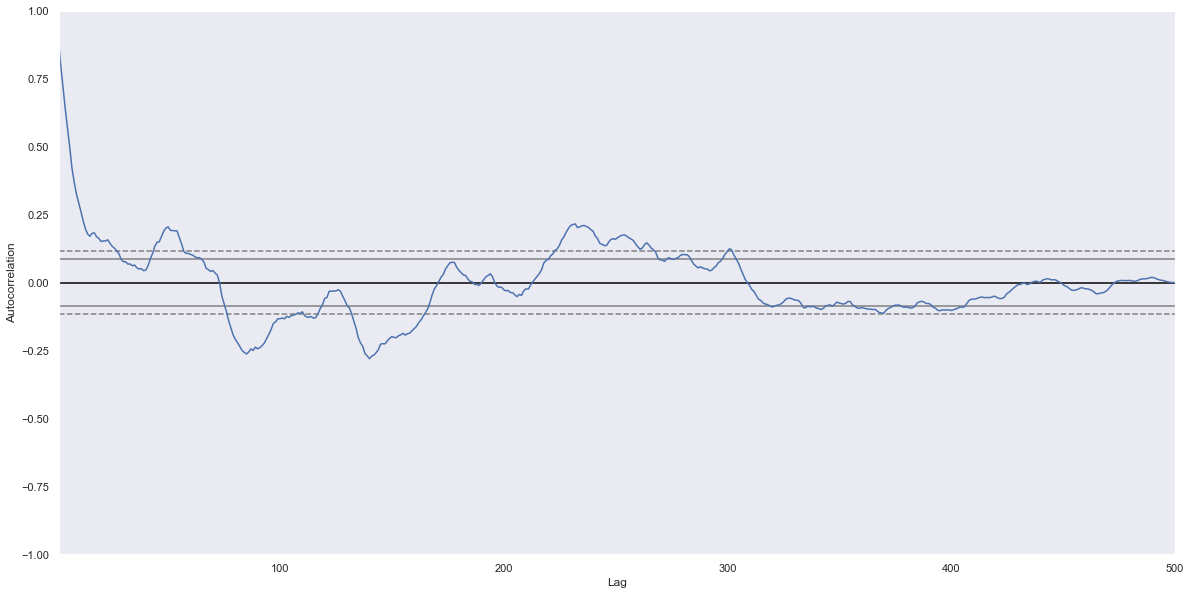

In [8]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(data['ts2']);

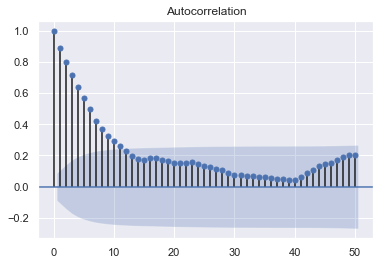

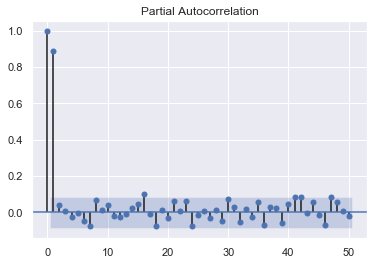

In [9]:
plot_acf(data['ts2'], lags=50);
plot_pacf(data['ts2'], lags=50);

- <b>TS2</b>. Según la gráfica de autocorrelación, esta cae después del 1ero elemento y sigue decreciendo con respecto al tiempo, por ende, este es un AR de orden 1 como se evidencia en la gráfica de PA

# TS3

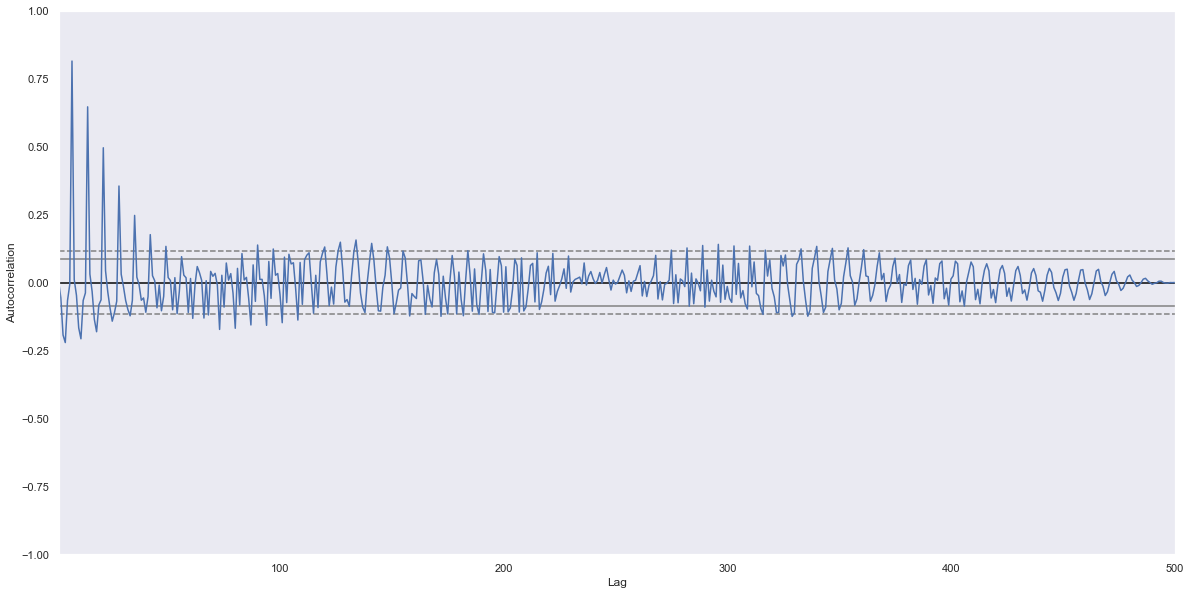

In [10]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(data['ts3']);

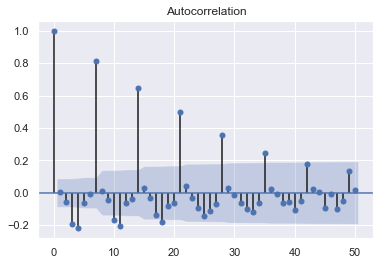

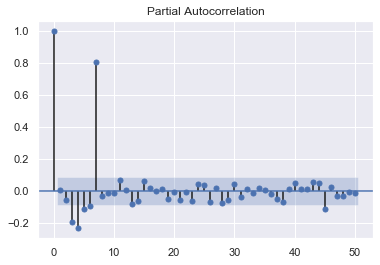

In [11]:
plot_acf(data['ts3'], lags=50);
plot_pacf(data['ts3'], lags=50);

- <b>TS3</b>. Según la gráfica de autocorrelación, esta cae cada 7mo elemento conforme al tiempo, por ende, este es un AR de orden 7

# TS4

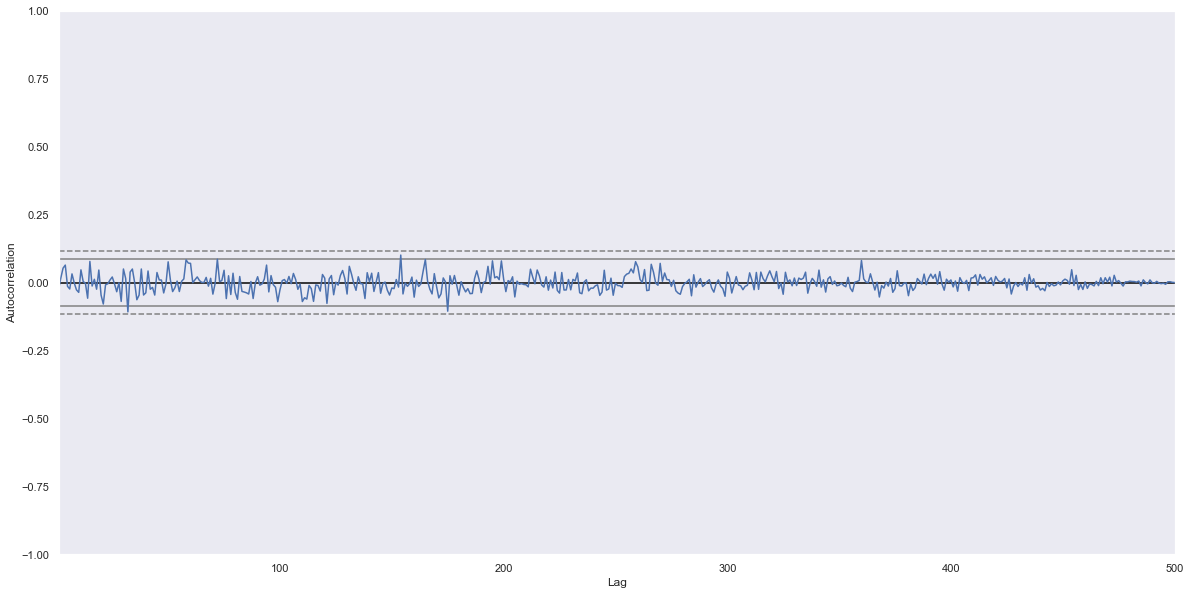

In [12]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(data['ts4']);

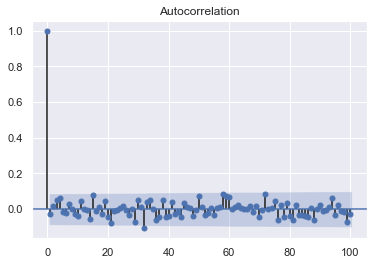

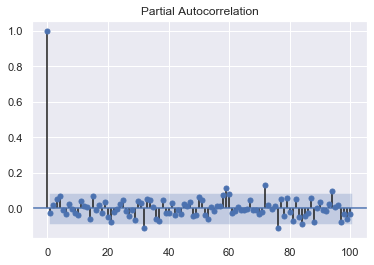

In [13]:
plot_acf(data['ts4'], lags=100);
plot_pacf(data['ts4'], lags=100);

- <b>TS4</b>. Según la gráfica de autocorrelación y de autocorrelación parcial, se evidencia que los datos NO estan autocorrelacionados, es decir, que mis datos pasados no explican mis datos presentes, lo que puede ser unos datos que se comportan una caminada aleatoria (random walk).

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast


a) Importamos el dataset y graficamos el comportamiento de la serie

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


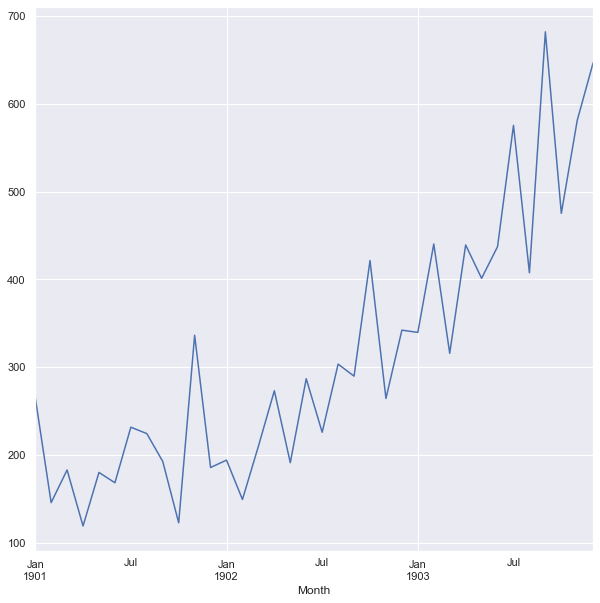

In [4]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('datasets\shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.plot(figsize=(10, 10));

b) construimos los graficos de autocorrelación y autocorrelación parcial

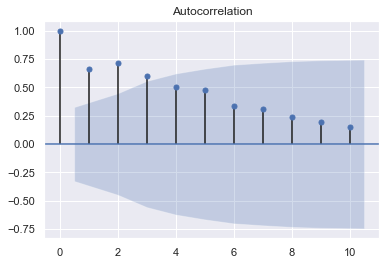

In [15]:
plot_acf(series, lags=10);

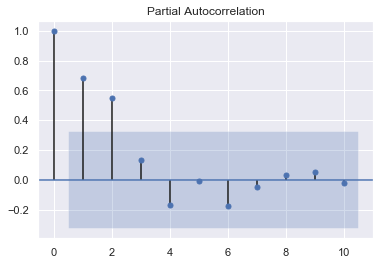

In [16]:
plot_pacf(series, lags=10);

- Identificamos que la serie se comporta como un proceso AR de orden 1

c) Posteriormente, para construir el modelo ARIMA iteramos sobre los parámetros p, d y q

In [17]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

X = series.values
size = int(len(X) * 0.66)
mse = list()

for p in range(15):
    for q in range(15):
        for d in range(6):
            try:
                train, test = X[0:size], X[size:len(X)]
                history = [x for x in train]
                predictions = list()
                for t in range(len(test)):
                    model = ARIMA(history, order=(p,d,q))
                    model_fit = model.fit(disp=0)
                    output = model_fit.forecast()
                    yhat = output[0]
                    predictions.append(yhat)
                    obs = test[t]
                    history.append(obs)
                mse.append([p,d,q,mean_squared_error(test, predictions) ** 0.5])
                print([p,d,q,mean_squared_error(test, predictions) ** 0.5])
            except:
                mse.append([p,d,q,99999])
                print([p,d,q,99999])


999]
[2, 4, 9, 99999]
[2, 5, 9, 99999]
[2, 0, 10, 99999]
[2, 1, 10, 99999]
[2, 2, 10, 99999]
[2, 3, 10, 99999]
[2, 4, 10, 99999]
[2, 5, 10, 99999]
[2, 0, 11, 99999]
[2, 1, 11, 99999]
[2, 2, 11, 99999]
[2, 3, 11, 99999]
[2, 4, 11, 99999]
[2, 5, 11, 99999]
[2, 0, 12, 99999]
[2, 1, 12, 99999]
[2, 2, 12, 99999]
[2, 3, 12, 99999]
[2, 4, 12, 99999]
[2, 5, 12, 99999]
[2, 0, 13, 99999]
[2, 1, 13, 99999]
[2, 2, 13, 99999]
[2, 3, 13, 99999]
[2, 4, 13, 99999]
[2, 5, 13, 99999]
[2, 0, 14, 99999]
[2, 1, 14, 99999]
[2, 2, 14, 99999]
[2, 3, 14, 99999]
[2, 4, 14, 99999]
[2, 5, 14, 99999]
[3, 0, 0, 97.50745277875767]
[3, 1, 0, 83.65966948471767]
[3, 2, 0, 102.53429466747963]
[3, 3, 0, 99999]
[3, 4, 0, 99999]
[3, 5, 0, 99999]
[3, 0, 1, 99999]
[3, 1, 1, 84.53328106135851]
[3, 2, 1, 99999]
[3, 3, 1, 99999]
[3, 4, 1, 99999]
[3, 5, 1, 99999]
[3, 0, 2, 99999]
[3, 1, 2, 99999]
[3, 2, 2, 99999]
[3, 3, 2, 99999]
[3, 4, 2, 99999]
[3, 5, 2, 99999]
[3, 0, 3, 99999]
[3, 1, 3, 99999]
[3, 2, 3, 99999]
[3, 3, 3, 99999

d) Finalmente, a partir de los vectores construidos identificamos aquen en donde se encuentra el menor MSE

In [18]:
mse = pd.DataFrame(mse)
mse.columns = ['p','d','q','mse']
mse[mse.iloc[:,3]==min(mse.iloc[:,3])]

,p,d,q,mse
20,0,2,3,62.75451
